In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
oliv = datasets.fetch_olivetti_faces()

In [21]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [22]:
oliv['data'].shape

(400, 4096)

In [23]:
oliv['images'].shape

(400, 64, 64)

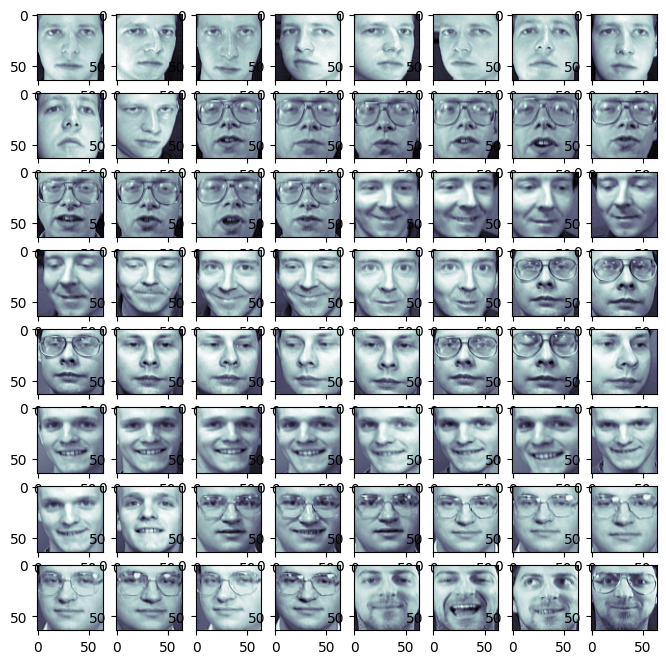

In [24]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [25]:
x = oliv.data
y = oliv.target

In [26]:
pca = PCA()
pca.fit(x)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [27]:
pca.components_.shape

(400, 4096)

In [28]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k

123

### Whiten

In [31]:
pca = PCA(n_components=k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [32]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [33]:
# Reshape data to 64x64
x_approx_images = x_approx.reshape((400, 64, 64))

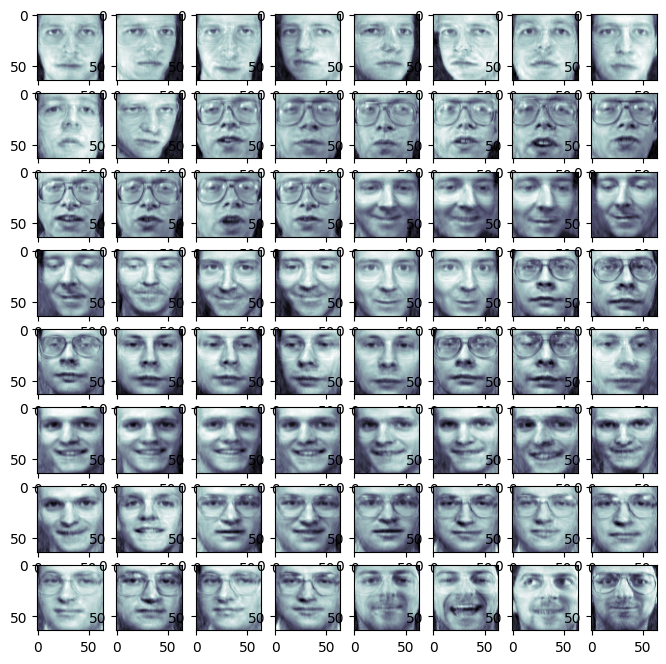

In [36]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()